# Task
This notebook importes , visualizes and preprocesses pre-selected datasets. The pre-selected datasets are then preprocessed and stored as a CSV-file

# Import

In [1]:
#Pandas: Reading and analyzing data
import pandas as pd
#Numerical calcuations
import numpy as np
#statistical data visualization
import seaborn as sns
#Use Dates in Datetime Format
import datetime
#Tensorflow

# Final Data Selection

In [18]:
#Selected files: 33
filenames = [
    'Data_0242-ZE01-70_2018-01-01 bis 2022-12-31.csv',#yes
    'Data_0242-ZE01-74_2018-01-01 bis 2022-12-31.csv',#yes  
    'Data_0245-ZE01-70_2018-01-01 bis 2022-12-31.csv',#yes
    'Data_0213-ZE01-71_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0232-ZE01-71_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0243-ZE01-70_2018-01-01 bis 2022-12-31.csv',#yes
    'Data_0404-ZE01-70_2018-01-01 bis 2022-12-31.csv',#yes
    'Data_0430-ZE01-70_2018-01-01 bis 2022-12-31.csv',#yes
    'Data_0439-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0439-ZE01-72_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0439-ZE02-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0101-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0101-ZE01-74_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0141-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0141-ZE01-74_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0145-ZE02-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0223-ZE01-71_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0223-ZE02-71_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0301-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0301-ZE01-74_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0301-ZE02-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0301-ZE02-74_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0301-ZE03-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0301-ZE03-74_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0303-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0310-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0330-ZE01-74_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0330-ZE02-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0330-ZE03-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0353-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_0353-ZE03-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_5311-ZE01-70_2018-01-01 bis 2018-06-30.csv',#yes
    'Data_6907-ZE01-74_2018-01-01 bis 2018-06-30.csv',#yes
]

,count,mean,std,min,25%,50%,75%,max
Wert,23444.0,8.538048,70.635212,-7608.56,6.45,8.34,10.67,7633.6


'Outliers: 2 Negative Outliers: 1 Missing values: 0 NaN values: 0'

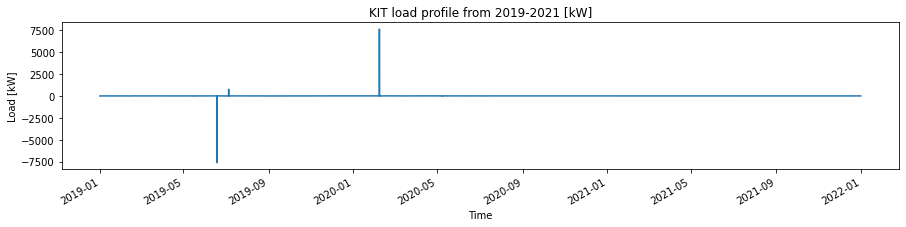

In [152]:
#Load data

#Define Path to datafile
user = 'rs1044' #'Jonas'
filename = filenames[32]
path = 'C:/Users/' + user + '/bwSyncShare/02Python Code/Data/01Load_data_raw/' + filename
# Get Data in Dataframe
df = pd.read_csv(path, usecols=["Datum", "Zeit", "Wert"], encoding= 'unicode_escape')
df.Datum = pd.to_datetime(df['Datum'] + ' ' + df['Zeit'])
df = df.set_index('Datum', drop=True).drop_duplicates(keep='first')
df.drop('Zeit', axis=1, inplace=True)
df = df.loc[(df.index >= '2019-01-01') & (df.index < '2022-01-01')]

#Describe + Head Dataframe
display(df.describe().transpose())
#Display Outliers
display("Outliers: " + str(df.loc[(df.Wert - df.Wert.rolling(3).median().abs()) > 38, "Wert"].count()) + 
       " Negative Outliers: " +  str(df.loc[df.Wert < 0, "Wert"].count()) + 
       " Missing values: " +  str(df.loc[df.Wert == 0, "Wert"].count()) + 
        " NaN values: " +  str(df.loc[df.Wert == np.nan, "Wert"].count())
       )

#Plot Result df
_ = df.Wert.plot(title="KIT load profile from 2019-2021 [kW]",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="Load [kW]",
             kind="line"
            )

,count,mean,std,min,25%,50%,75%,max
Wert,23444.0,8.493917,3.084168,0.01,6.46,8.34,10.6525,19.08


'Outliers: 0 Negative Outliers: 0 Missing values: 0 NaN values: 0'

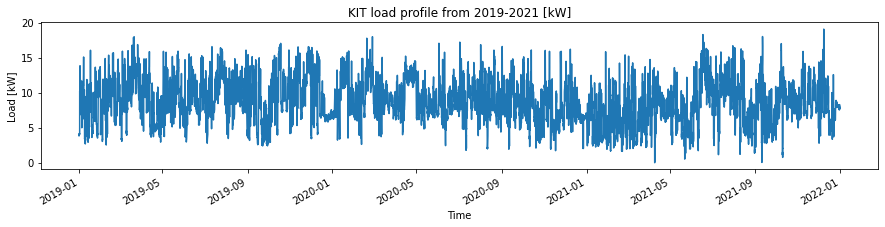

In [153]:
#Preprocess data and visualize

final_df = df
#Cleaning
#No negative values: Replace negative values,with median of last 3 values
final_df.loc[final_df.Wert < 0, "Wert"] = final_df.Wert.rolling(3).median().abs()

#No outliers: Replace values which are 38 higher or lower from the median of a length-3 rolling window with the median
final_df.loc[(final_df.Wert > (final_df.Wert.rolling(3).std().abs())), "Wert"] = final_df.Wert.rolling(3).median().abs()

#Reduce missing values: Fill 3 missing values by polynomial interpolation
final_df.loc[final_df.Wert == 0, "Wert"] = np.nan
final_df.Wert.interpolate(method='linear', inplace=True, limit=3)

#Set missing values to 0
final_df.loc[final_df.Wert.isnull(), "Wert"] = 0


#Describe + Head Dataframe
display(final_df.describe().transpose())
#Display Outliers
display("Outliers: " + str(final_df.loc[(final_df.Wert - final_df.Wert.rolling(3).median().abs()) > 38, "Wert"].count()) + 
       " Negative Outliers: " +  str(final_df.loc[final_df.Wert < 0, "Wert"].count()) + 
       " Missing values: " +  str(final_df.loc[final_df.Wert == 0, "Wert"].count()) + 
        " NaN values: " +  str(final_df.loc[final_df.Wert == np.nan, "Wert"].count())
       )

#Plot Result df
_ = final_df.Wert.plot(title="KIT load profile from 2019-2021 [kW]",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="Load [kW]",
             kind="line"
            )

In [149]:
#Save preprocessed data in csv
final_xls_name = 'C:/Users/' + user + '/bwSyncShare/02Python Code/Data/00Final_data_prepocessed/' + filename
final_df.to_csv(final_xls_name , index = True, index_label='Date')

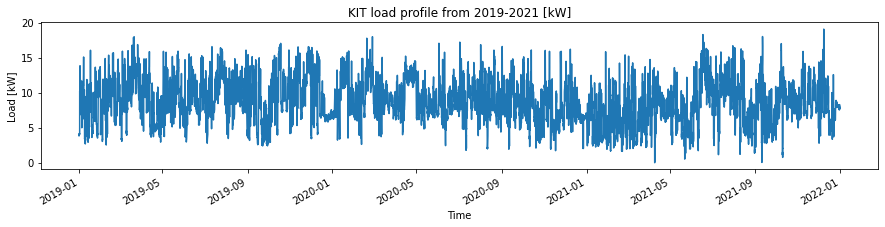

In [150]:
#Check if csv worked
df = pd.read_csv(final_xls_name, usecols=["Date", "Wert"], encoding= 'unicode_escape')
df.Date = pd.to_datetime(df['Date'])
df = df.set_index('Date', drop=True)
_ = df.Wert.plot(title="KIT load profile from 2019-2021 [kW]",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="Load [kW]",
             kind="line"
            )